In [77]:
from modules.training_and_fine_tuning.training.train_cnn_model_using_feature_statistics import CnnModelUsingFeatureStatistics
from modules.training_and_fine_tuning.utils.feature_statistics_data_utils import DataUtils
from config.eng_config import Config
from modules.training_and_fine_tuning.utils.model_utils import ModelUtilities

In [78]:
def get_n_mfcc_paths(n_mfcc, Config):
    train_path = Config.n_mfcc_config[n_mfcc].train_path
    validation_path = Config.n_mfcc_config[n_mfcc].validation_path
    test_path = Config.n_mfcc_config[n_mfcc].test_path
    return train_path, validation_path, test_path

# Chuẩn bị dữ liệu

**Thử nghiệm với n_mfcc = 26**

In [79]:
n_mfcc = 20
train_file_path, test_file_path, val_file_path = DataUtils.get_n_mfcc_paths(n_mfcc, Config)
x_traincnn, y_train, x_valcnn, y_val, x_testcnn, y_test, scaler = DataUtils.prepare_data(train_file_path, test_file_path, val_file_path)

# Huấn luyện mô hình

In [80]:
model = CnnModelUsingFeatureStatistics((x_traincnn.shape[1], 1), 7)

d:\data_analysis\speech_emotion_recognition\.venv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2024-06-14 03:59:46.640 | INFO     | keras.src.utils.summary_utils:print_summary:366 - Model: "sequential_8"
┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d_32 (Conv1D)              │ (None, 244, 128)       │           512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_40          │ (None, 244, 128)       │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_33 (Conv1D)              │ (None, 244, 128)       │        49,280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_41          │ (None, 244, 128)       │           512 │
│ (BatchNormalization)            │         

In [81]:
history = model.train_model(x_traincnn, y_train, x_valcnn, y_val, f'cnn_model_using_feature_statistics_with_{n_mfcc}_n_mfcc', patience_early_stop=7, patience_lr_reduction=4, factor=0.5, epochs=50, batch_size=64, learning_rate=0.00002)

Epoch 1/50
421/421 ━━━━━━━━━━━━━━━━━━━━ 18s 39ms/step - accuracy: 0.2528 - loss: 2.3624 - val_accuracy: 0.4359 - val_loss: 1.4769 - learning_rate: 2.0000e-05
Epoch 2/50
421/421 ━━━━━━━━━━━━━━━━━━━━ 15s 37ms/step - accuracy: 0.4385 - loss: 1.6489 - val_accuracy: 0.5399 - val_loss: 1.2398 - learning_rate: 2.0000e-05
Epoch 3/50
421/421 ━━━━━━━━━━━━━━━━━━━━ 16s 39ms/step - accuracy: 0.4970 - loss: 1.4257 - val_accuracy: 0.5689 - val_loss: 1.1677 - learning_rate: 2.0000e-05
Epoch 4/50
421/421 ━━━━━━━━━━━━━━━━━━━━ 16s 38ms/step - accuracy: 0.5237 - loss: 1.3415 - val_accuracy: 0.5860 - val_loss: 1.1168 - learning_rate: 2.0000e-05
Epoch 5/50
421/421 ━━━━━━━━━━━━━━━━━━━━ 15s 37ms/step - accuracy: 0.5471 - loss: 1.2485 - val_accuracy: 0.5896 - val_loss: 1.0888 - learning_rate: 2.0000e-05
Epoch 6/50
421/421 ━━━━━━━━━━━━━━━━━━━━ 15s 36ms/step - accuracy: 0.5681 - loss: 1.1876 - val_accuracy: 0.5974 - val_loss: 1.0730 - learning_rate: 2.0000e-05
Epoch 7/50
421/421 ━━━━━━━━━━━━━━━━━━━━ 15s 36ms/ste

In [82]:
model = ModelUtilities.load_model(f'cnn_model_using_feature_statistics_with_{n_mfcc}_n_mfcc.keras')

In [83]:
ModelUtilities.evaluate_model(model, x_testcnn, y_test)

106/106 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.6658 - loss: 0.9093
Test Accuracy: 0.6645889282226562


(0.9025362730026245, 0.6645889282226562)

In [84]:
history

In [85]:
history_dict = history.history
print(history_dict)

{'accuracy': [0.32101333141326904, 0.4547007977962494, 0.5100479125976562, 0.5324468016624451, 0.553285539150238, 0.5735670924186707, 0.5858994722366333, 0.5990118980407715, 0.6055124402046204, 0.6165447235107422, 0.6277255415916443, 0.6317372918128967, 0.6425838470458984, 0.6463356018066406, 0.6580736041069031, 0.6592251658439636, 0.6705545783042908, 0.6723004579544067, 0.6793209910392761, 0.6831098198890686, 0.6898703575134277, 0.6971137523651123, 0.699862539768219, 0.7056573033332825, 0.7107090950012207, 0.7195497751235962, 0.721072793006897, 0.7247130274772644, 0.7231158018112183, 0.7268674969673157, 0.730693519115448, 0.735633909702301, 0.7358939051628113, 0.7365625500679016, 0.7420229315757751, 0.7437688112258911, 0.7445488572120667, 0.7462947368621826, 0.7503436207771301, 0.7561754584312439, 0.7486348748207092, 0.7565469145774841], 'loss': [2.0768773555755615, 1.5825684070587158, 1.3935751914978027, 1.305962085723877, 1.236207365989685, 1.1741966009140015, 1.1282998323440552, 1.

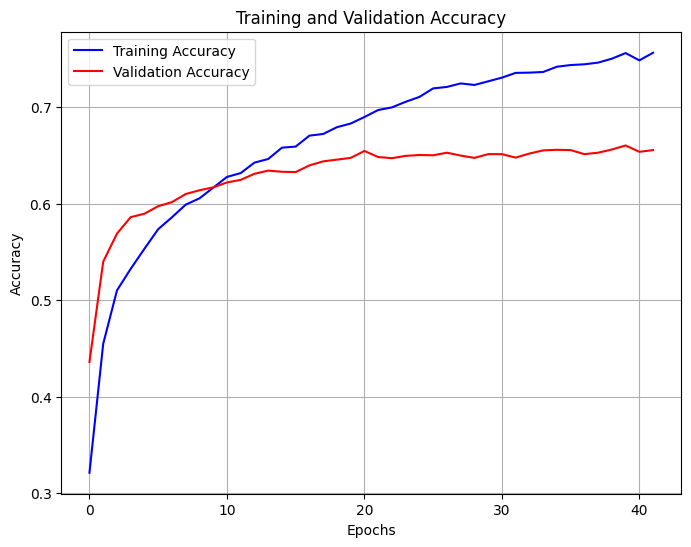

In [86]:
ModelUtilities.plot_training_history(history_dict)

106/106 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step


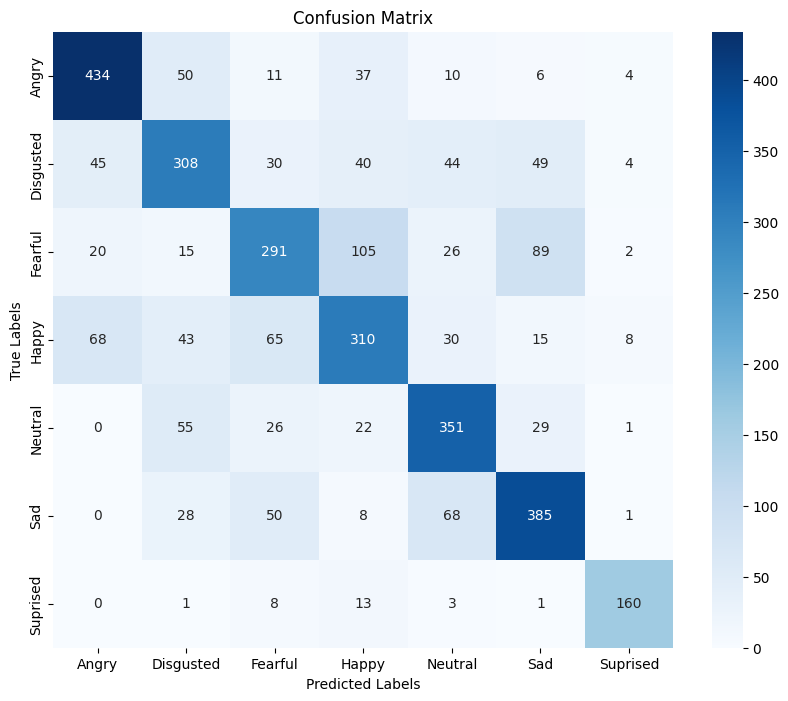

In [87]:
ModelUtilities.plot_confusion_matrix(model, x_testcnn, y_test, ['Angry', 'Disgusted', 'Fearful', 'Happy', 'Neutral', 'Sad', 'Suprised'])

106/106 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step


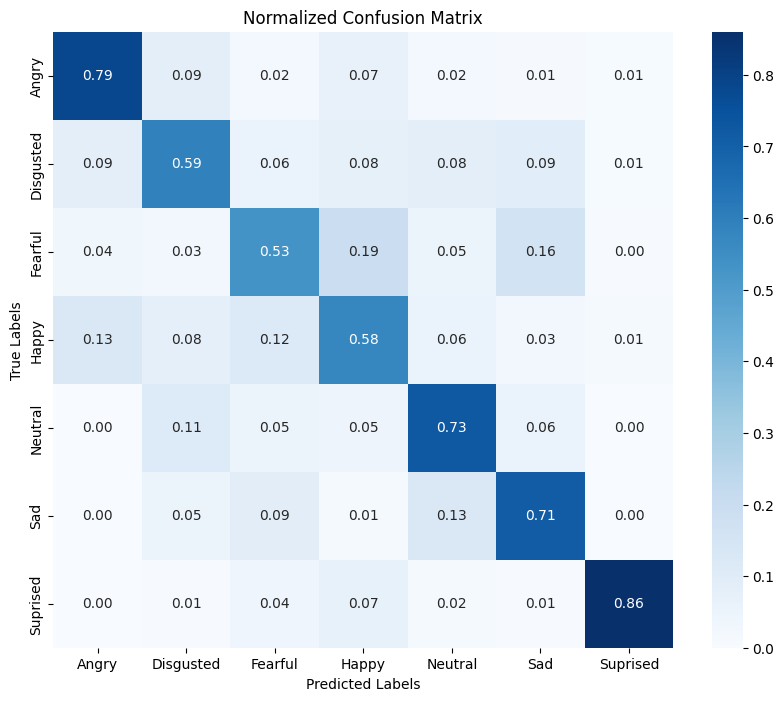

In [88]:
ModelUtilities.plot_confusion_matrix_normalized(model, x_testcnn, y_test, ['Angry', 'Disgusted', 'Fearful', 'Happy', 'Neutral', 'Sad', 'Suprised'])